In [130]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import elephant as el
import quantities as pq
import seaborn as sns
sns.set(context='notebook', style="ticks", palette="Set2")

In [25]:
fs = 1000*pq.Hz
T = 100*pq.s
t = np.linspace(0, T.magnitude, (fs*T).magnitude) # s

In [105]:
f = 5 # Hz

sinewave = np.sin(t*2*np.pi*f)

blockfunc = sc.signal.square(t*2*np.pi*f, duty=0.2)

In [ ]:
sine_freqs, sine_psd = el.spectral.welch_psd(sinewave, 
                                             freq_res=1*pq.Hz, 
                                             overlap=0.5, 
                                             fs=fs, 
                                             nfft=None)
block_freqs, block_psd = el.spectral.welch_psd(blockfunc, 
                                              freq_res=1*pq.Hz, 
                                              overlap=0.5, 
                                              fs=fs, 
                                              nfft=None)

(0, 100)

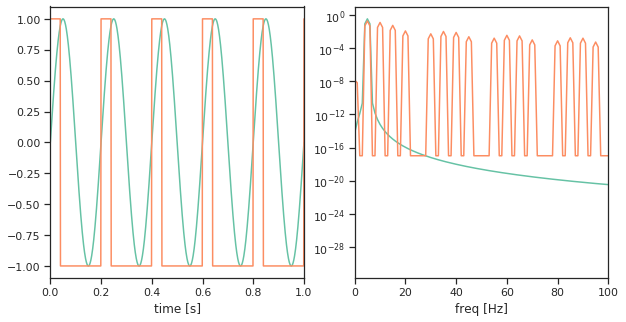

In [146]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

ax[0].plot(t, sinewave)
ax[0].plot(t, blockfunc)
ax[0].set_xlabel('time [s]')
ax[0].set_xlim(0,1)

ax[1].plot(sine_freqs, sine_psd)
ax[1].plot(block_freqs, block_psd)
ax[1].set_xlabel('freq [Hz]')
ax[1].set_yscale('log')
ax[1].set_xlim(0, 100)